# Decison Tree 

In [1]:
# import the libraries 
import pandas as pd 
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [3]:
# load the cleaned dataset
df_census = pd.read_csv("../Data/cleaned_census.csv")
df_census.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# get info on the data 
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ ?                                32561 non-null  int64
 7   workclass_ Federal-gov                      32561 non-null  int64
 8   workclass_ Local-gov                        32561 non-null  int64
 9   workclass_ Never-worked                     32561 non-null  int64
 10  workclass_ Private                

The target is to know whether some person is making 50K. Thus either of the columns `income_ <=50K` or `income_ >50K` will do! Thus we can drop any one!

In [7]:
df_census.drop(labels=['income_ <=50K'], axis=1, inplace=True)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ ?                                32561 non-null  int64
 7   workclass_ Federal-gov                      32561 non-null  int64
 8   workclass_ Local-gov                        32561 non-null  int64
 9   workclass_ Never-worked                     32561 non-null  int64
 10  workclass_ Private                

In [8]:
# let us now separate the predictor columns and the target column 
X = df_census.iloc[:,:-1] # all columns except the last one 
y = df_census.iloc[:,-1] # the last column is the target 

In [9]:
# let us split the data in train and test set
from sklearn.model_selection import train_test_split

# the train and the test set - by default the test size is 0.25
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2)

In [13]:
# let us fit the Decison Tree Classifier Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# initiate the model 
clf = DecisionTreeClassifier(random_state=2)

# fit the model 
clf.fit(X_train, y_train)

# make predictins for the test set
y_pred = clf.predict(X_test)

# compare the actual and the predicted
accuracy_score(y_pred=y_pred, y_true=y_test)

0.8131679154894976

So, we find that the Decision Tree Classifier Model has achieved an accuracy of 81%! 

**NOTE**

Let me explain how accuracy is calculated for a classifier. 

Accuracy is one of the most straightforward metrics - it's simply the ratio of correct predictions to total predictions:

```
Accuracy = (True Positives + True Negatives) / (Total Number of Cases)
```

For example, if you have a binary classifier:
- True Positives (TP): Cases correctly predicted as positive
- True Negatives (TN): Cases correctly predicted as negative 
- False Positives (FP): Cases incorrectly predicted as positive
- False Negatives (FN): Cases incorrectly predicted as negative

Then accuracy would be:
```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

While accuracy is intuitive, it can be misleading with imbalanced datasets. For instance, if you have a dataset where 95% of cases are negative, a classifier could achieve 95% accuracy by simply predicting "negative" for everything - which isn't very useful.

That's why accuracy is usually considered alongside other metrics like:
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN) 
- F1 Score: Harmonic mean of precision and recall

In [14]:
clf.classes_

array([0, 1])

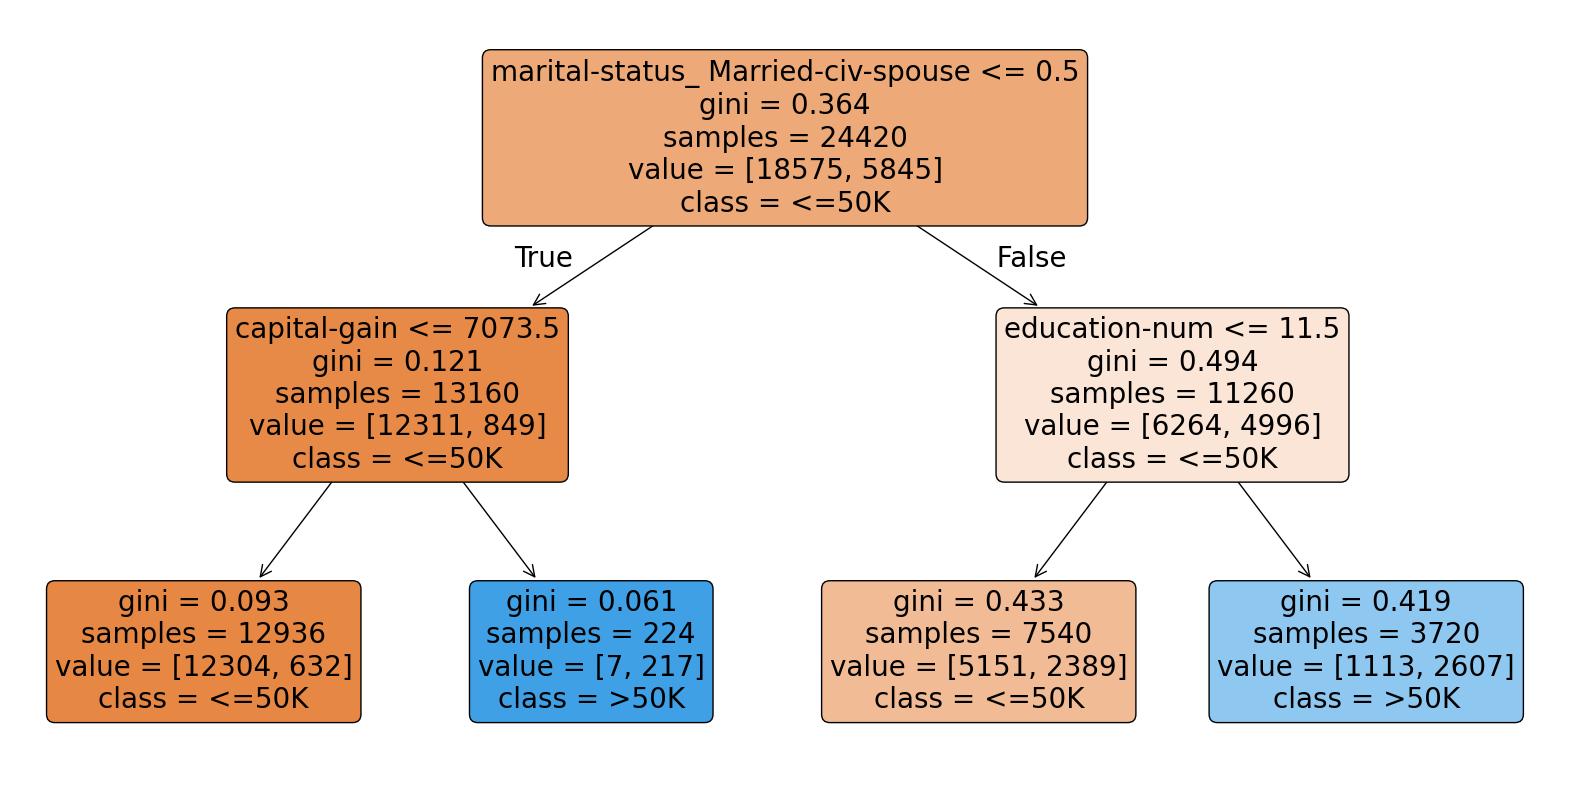

In [28]:
# let us now try to visualize the tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# create and fit the decision tree , keeping the max_depth low so that it is easy to visualize the tree formed 
clf_plot = DecisionTreeClassifier(random_state=2, max_depth=2)
clf_plot.fit(X_train, y_train)

# Create the visualization
plt.figure(figsize=(20,10))
plot_tree(clf_plot, 
          feature_names=X_train.columns,  # Replace with your feature names
          class_names=['<=50K','>50K'],  # Class names if you have them
          filled=True,              # Color nodes by class
          rounded=True,             # Round edges
          fontsize=20)              

# Show the plot
plt.show()

Here is a complete analysis of all nodes and leaves of the decision tree in tabular format:

---

### **Explanation of Node Components**
Each node contains the following:
- **Feature**: The variable used for the split (e.g., `marital-status_Married-civ-spouse`).
- **Threshold**: The value used to split the data (e.g., `<= 0.5`).
- **Gini**: The Gini impurity of the node.
- **Samples**: The number of samples in the node.
- **Value**: The distribution of samples in different classes (e.g., `[18575, 5845]`).
- **Class**: The class with the majority of samples in the node (e.g., `<=50K`).

---
